In [1]:
import pandas as pd
import numpy as np

In [2]:
# !pip install spacy
#     or
# !pip install spacy-lookups-data

# !pip install en_core_web_sm
# !pip install en_core_web_md
# !pip install en_core_web_lg
#     or
# !python -m spacy download en_core_web_sm
# !python -m spacy download en_core_web_md
# !python -m spacy download en_core_web_lg

In [3]:
import os
os.chdir('C:/Users/DELL/Desktop/Projects/KGP Talkie/NLP')


# multiple statements output in one cell with out print() funcation

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 


In [4]:
df = pd.read_csv(r"nlp_sentiment.csv", encoding= 'latin1', header= None)
df.head()
df.tail()

0           1                             2         3                4  \
0  0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_   
1  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
2  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
3  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
4  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   

                                                   5  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1  is upset that he can't update his Facebook by ...  
2  @Kenichan I dived many times for the ball. Man...  
3    my whole body feels itchy and like its on fire   
4  @nationwideclass no, it's not behaving at all....

0           1                             2         3  \
1599995  4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996  4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997  4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998  4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999  4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                       4                                                  5  
1599995  AmandaMarie1028  Just woke up. Having no school is the best fee...  
1599996      TheWDBoards  TheWDB.com - Very cool to hear old Walt interv...  
1599997           bpbabe  Are you ready for your MoJo Makeover? Ask me f...  
1599998     tinydiamondz  Happy 38th Birthday to my boo of alll time!!! ...  
1599999   RyanTrevMorris  happy #charitytuesday @theNSPCC @SparksCharity...

In [5]:
df.shape

(1600000, 6)

In [6]:
df = df[[5, 0]]
df.head()

5  0
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  0
1  is upset that he can't update his Facebook by ...  0
2  @Kenichan I dived many times for the ball. Man...  0
3    my whole body feels itchy and like its on fire   0
4  @nationwideclass no, it's not behaving at all....  0

In [7]:
df.columns =['twitts', 'sentiment']
df.head()

twitts  sentiment
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...          0
1  is upset that he can't update his Facebook by ...          0
2  @Kenichan I dived many times for the ball. Man...          0
3    my whole body feels itchy and like its on fire           0
4  @nationwideclass no, it's not behaving at all....          0

In [8]:
df['sentiment'].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [9]:
sent_map = {0:'negative', 4:'positive'}

In [10]:
df_neg = df[df['sentiment'] ==0 ].head(50)
df_pos = df[df['sentiment'] ==4 ].head(50)

df_neg.shape
df_pos.shape

df_neg = df_neg[0:50]
df_pos = df_pos[0:50]

df_neg.head()
df_pos.head()

(50, 2)

(50, 2)

twitts  sentiment
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...          0
1  is upset that he can't update his Facebook by ...          0
2  @Kenichan I dived many times for the ball. Man...          0
3    my whole body feels itchy and like its on fire           0
4  @nationwideclass no, it's not behaving at all....          0

twitts  sentiment
800000       I LOVE @Health4UandPets u guys r the best!!           4
800001  im meeting up with one of my besties tonight! ...          4
800002  @DaRealSunisaKim Thanks for the Twitter add, S...          4
800003  Being sick can be really cheap when it hurts t...          4
800004    @LovesBrooklyn2 he has that effect on everyone           4

In [11]:
df = df_neg.append(df_pos)

df.shape

(100, 2)

### Word Counts

In [12]:
text = 'I am Kranthi Giramoni, I am from Hyderabad'

In [13]:
#  Word Counts of text 
len(str(text).split())

8

In [14]:
df['word_counts'] = df['twitts'].apply(lambda x: len(str(x).split()))

In [15]:
df.head()

twitts  sentiment  word_counts
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...          0           19
1  is upset that he can't update his Facebook by ...          0           21
2  @Kenichan I dived many times for the ball. Man...          0           18
3    my whole body feels itchy and like its on fire           0           10
4  @nationwideclass no, it's not behaving at all....          0           21

### Character Count

In [16]:
df['char_counts'] = df['twitts'].apply(lambda x: len(x))

In [17]:
df.head()

twitts  sentiment  word_counts  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...          0           19   
1  is upset that he can't update his Facebook by ...          0           21   
2  @Kenichan I dived many times for the ball. Man...          0           18   
3    my whole body feels itchy and like its on fire           0           10   
4  @nationwideclass no, it's not behaving at all....          0           21   

   char_counts  
0          115  
1          111  
2           89  
3           47  
4          111

### Average Word Length

In [18]:
#Exmp
text = 'kranthi is working on NLP Project'
chart_count_text = len(text)
chart_count_text

word_cout_text = len(text.split())
word_cout_text

avg_len = len(text)/len(text.split()) #len(character)/ len(words)
avg_len

33

6

5.5

In [19]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len/len(words )   #len(x)/len(words) 

In [20]:
df['avg_word_len'] = df['twitts'].apply(lambda x: get_avg_word_len(x))

In [21]:
df.head()

twitts  sentiment  word_counts  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...          0           19   
1  is upset that he can't update his Facebook by ...          0           21   
2  @Kenichan I dived many times for the ball. Man...          0           18   
3    my whole body feels itchy and like its on fire           0           10   
4  @nationwideclass no, it's not behaving at all....          0           21   

   char_counts  avg_word_len  
0          115      5.052632  
1          111      4.285714  
2           89      3.944444  
3           47      3.700000  
4          111      4.285714

### Stop Words

In [22]:
#method 1 : using corpus

import nltk
from nltk.corpus import stopwords
#set(stopwords.words('english'))
 

In [23]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

#### Method 2 : Using Spacy

In [24]:
#!pip install spacy

In [25]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [26]:
print(STOP_WORDS)

{'both', 'becoming', 'a', 'made', '’ve', 'also', 'now', 'what', 'beside', 'his', 'their', 'you', 'during', 'regarding', 'therein', 'by', 'so', 'though', 'third', 'about', 'hundred', 'many', 'too', 'as', 'meanwhile', 'seem', 'more', 'nothing', 'next', 'using', 'somehow', 'ours', 'from', 'for', 'why', 'no', 'should', 'then', 'latter', 'thru', 'used', 'whom', 'between', 'while', 'i', 'can', 'name', 'either', 'yourself', 'five', 'us', 'various', 'thereafter', 'however', 'whenever', 'often', 'on', 'serious', 'whoever', 'became', 'than', 'could', 'done', 'not', 'every', 'indeed', 'besides', 'nor', 'has', 'sometimes', 'just', "'m", 'own', 'nine', "n't", 'herein', 'via', 'some', 'perhaps', 'is', 'much', 'might', 'formerly', '’d', '’ll', 'take', 'would', 'him', 'she', 'the', 'one', 'must', 'always', 'alone', 'make', "'d", 'towards', 'across', 'moreover', 'among', 'seemed', 'toward', 'other', 'that', 'nowhere', 'those', 'yourselves', 'are', 'less', 'first', "'ve", 'another', 'least', 'n’t', 'he'

### Stop Words Count

In [27]:
text = 'kranthi is working on NLP Project'
text.split() 
[t for t in text.split() if t in STOP_WORDS]
len([t for t in text.split() if t in STOP_WORDS])

['kranthi', 'is', 'working', 'on', 'NLP', 'Project']

['is', 'on']

2

In [28]:
df['stop_words_len'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS]))

In [29]:
df.head()

twitts  sentiment  word_counts  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...          0           19   
1  is upset that he can't update his Facebook by ...          0           21   
2  @Kenichan I dived many times for the ball. Man...          0           18   
3    my whole body feels itchy and like its on fire           0           10   
4  @nationwideclass no, it's not behaving at all....          0           21   

   char_counts  avg_word_len  stop_words_len  
0          115      5.052632               4  
1          111      4.285714               9  
2           89      3.944444               7  
3           47      3.700000               5  
4          111      4.285714              10

### Count #Hash Tags and @Mentions 

In [30]:
text = '@kranthi is #working on #NLP @#Project'
text.split()
[t for t in text.split() if t.startswith('@')]
[t for t in text.split() if t.startswith('#')]
[t for t in text.split() if t.startswith('@#')]

['@kranthi', 'is', '#working', 'on', '#NLP', '@#Project']

['@kranthi', '@#Project']

['#working', '#NLP']

['@#Project']

In [31]:
df['hashtags_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))
df['mentionstags_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))

In [32]:
df.head()

twitts  sentiment  word_counts  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...          0           19   
1  is upset that he can't update his Facebook by ...          0           21   
2  @Kenichan I dived many times for the ball. Man...          0           18   
3    my whole body feels itchy and like its on fire           0           10   
4  @nationwideclass no, it's not behaving at all....          0           21   

   char_counts  avg_word_len  stop_words_len  hashtags_count  \
0          115      5.052632               4               0   
1          111      4.285714               9               0   
2           89      3.944444               7               0   
3           47      3.700000               5               0   
4          111      4.285714              10               0   

   mentionstags_count  
0                   1  
1                   0  
2                   1  
3                   0  
4                   1

### if numeric digits are present in twitts

In [33]:
text = 'I am Kranthi Giramoni, I am from Hyderabad, My Phone Number 9010313781'

[t for t in text.split() if t.isdigit()]

len([t for t in text.split() if t.isdigit()])

['9010313781']

1

In [34]:
df['numerics_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [35]:
df.head()

twitts  sentiment  word_counts  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...          0           19   
1  is upset that he can't update his Facebook by ...          0           21   
2  @Kenichan I dived many times for the ball. Man...          0           18   
3    my whole body feels itchy and like its on fire           0           10   
4  @nationwideclass no, it's not behaving at all....          0           21   

   char_counts  avg_word_len  stop_words_len  hashtags_count  \
0          115      5.052632               4               0   
1          111      4.285714               9               0   
2           89      3.944444               7               0   
3           47      3.700000               5               0   
4          111      4.285714              10               0   

   mentionstags_count  numerics_count  
0                   1               0  
1                   0               0  
2                   1               0  
3                   0               0  
4                   1               0

### UPPER case words count

In [36]:
df['uppercase_count'] = df['twitts'].apply(lambda x:len([t for t in x.split() if t.isupper() and len(x)>3]))

In [37]:
df

twitts  sentiment  \
0       @switchfoot http://twitpic.com/2y1zl - Awww, t...          0   
1       is upset that he can't update his Facebook by ...          0   
2       @Kenichan I dived many times for the ball. Man...          0   
3         my whole body feels itchy and like its on fire           0   
4       @nationwideclass no, it's not behaving at all....          0   
5                           @Kwesidei not the whole crew           0   
6                                             Need a hug           0   
7       @LOLTrish hey  long time no see! Yes.. Rains a...          0   
8                    @Tatiana_K nope they didn't have it           0   
9                               @twittera que me muera ?           0   
10            spring break in plain city... it's snowing           0   
11                             I just re-pierced my ears           0   
12      @caregiving I couldn't bear to watch it.  And ...          0   
13      @octolinz16 It it counts, idk why I did either...          0   
14      @smarrison i would've been the first, but i di...          0   
15      @iamjazzyfizzle I wish I got to watch it with ...          0   
16      Hollis' death scene will hurt me severely to w...          0   
17                                   about to file taxes           0   
18      @LettyA ahh ive always wanted to see rent  lov...          0   
19      @FakerPattyPattz Oh dear. Were you drinking ou...          0   
20      @alydesigns i was out most of the day so didn'...          0   
21      one of my friend called me, and asked to meet ...          0   
22       @angry_barista I baked you a cake but I ated it           0   
23                 this week is not going as i had hoped           0   
24                             blagh class at 8 tomorrow           0   
25         I hate when I have to call and wake people up           0   
26      Just going to cry myself to sleep after watchi...          0   
27                                 im sad now  Miss.Lilly          0   
28      ooooh.... LOL  that leslie.... and ok I won't ...          0   
29      Meh... Almost Lover is the exception... this t...          0   
...                                                   ...        ...   
800020  Didn't place in the Peeps contest but thanks f...          4   
800021  Going to bed so goodnight everyone  and sweet ...          4   
800022  @LittleLumen walking over to put the deposit d...          4   
800023  is now followinq @DAChesterFrench , you shud d...          4   
800024  @LordPov Are you meant to add on the back of t...          4   
800025  Aw i'm holding my new puppy. Well He's not min...          4   
800026  @iJohn kitteh is sleepin on my crotch which pr...          4   
800027                                @DramaBeats agreed           4   
800028  reaching amritsar in an hour and (if i find a ...          4   
800029  @ALBinLA.  I was just thinking about you tonig...          4   
800030              happy to spend time with the family.           4   
800031  finally going to bed!  so tired. Was gonna wat...          4   
800032  so effing tired of my throat hurting.... ooooo...          4   
800033         @deon upload di indowebster dong banggggg           4   
800034   @wisdomous you're welcome. glad you enjoyed it.           4   
800035  @hawaii808shellz hAhAHA!! omG! we wer bOth lau...          4   
800036  @SickWithThePen awww pookie feel better. I'll ...          4   
800037                     YAY! found a new cuddle buddy           4   
800038  I think I met my first &quot;snob&quot; on twi...          4   
800039   Across the Universe. Sleep. Rehearsal tomorrow.           4   
800040                @annabellee dry sweet potato, huh?           4   
800041  @JonathanRKnight Hi Jon! Great to hear from yo...          4   
800042      having a long conversation with mom on phone           4   
800043  @suitelifeofkell yayyy! lol. i just requested ...          4   
800044  Practicing 

## Preprocessing and Cleaning

#### Lower case conversion

In [38]:
#before Lower case Conversion
df['twitts'].sample(5)

31        @alielayus I want to go to promote GEAR AND GR...
800040                  @annabellee dry sweet potato, huh? 
800023    is now followinq @DAChesterFrench , you shud d...
800001    im meeting up with one of my besties tonight! ...
800002    @DaRealSunisaKim Thanks for the Twitter add, S...
Name: twitts, dtype: object

In [39]:
df['twitts'] = df['twitts'].apply(lambda x: x.lower())

In [40]:
df[20:25].head()

twitts  sentiment  word_counts  \
20  @alydesigns i was out most of the day so didn'...          0           13   
21  one of my friend called me, and asked to meet ...          0           20   
22   @angry_barista i baked you a cake but i ated it           0           10   
23             this week is not going as i had hoped           0            9   
24                         blagh class at 8 tomorrow           0            5   

    char_counts  avg_word_len  stop_words_len  hashtags_count  \
20           62      3.769231              10               0   
21          101      4.050000               9               0   
22           48      3.800000               4               0   
23           38      3.222222               6               0   
24           26      4.200000               1               0   

    mentionstags_count  numerics_count  uppercase_count  
20                   1               0                0  
21                   0               0                0  
22                   1               0                2  
23                   0               0                0  
24                   0               1                0

In [41]:
#after lower case conversion
df['twitts'].sample(5)

800005    @productoffear you can tell him that i just bu...
800037                       yay! found a new cuddle buddy 
800017           @nicolerichie: your picture is very sweet 
26        just going to cry myself to sleep after watchi...
800043    @suitelifeofkell yayyy! lol. i just requested ...
Name: twitts, dtype: object

### Contraction to Expansion

In [42]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you shall",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have",
"u": "you",
"ur": "your",
"nd": "and" }

In [43]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [44]:
text = "i don't know what you want, can't, he'll, i'd, i'll've"

In [45]:
cont_to_exp(text)

'i do not know what yoyou want, cannot, he shall / he will, I had / I woyould, I shall / I will have'

In [46]:
%%time 
df['twitts'] = df['twitts'].apply(lambda x: cont_to_exp(x))

Wall time: 8.02 ms


In [47]:
df.head()

twitts  sentiment  word_counts  \
0  @switchfoot http://twitpic.com/2y1zl - awww, t...          0           19   
1  is youpset that he cannot youpdate his faceboo...          0           21   
2  @kenichan i dived many times for the ball. man...          0           18   
3   my whole body feels itchy aand like its on fire           0           10   
4  @nationwideclass no, it has / it is not behavi...          0           21   

   char_counts  avg_word_len  stop_words_len  hashtags_count  \
0          115      5.052632               4               0   
1          111      4.285714               9               0   
2           89      3.944444               7               0   
3           47      3.700000               5               0   
4          111      4.285714              10               0   

   mentionstags_count  numerics_count  uppercase_count  
0                   1               0                1  
1                   0               0                0  
2                   1               0                1  
3                   0               0                0  
4                   1               0                1

### Count and Remove Emails

In [48]:
import re

In [49]:
text = "hi my email is kranthi@email.com giramoni@email.com"

In [50]:
re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)',text)

['kranthi@email.com', 'giramoni@email.com']

In [51]:
df['emails'] = df['twitts'].apply(lambda x:re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)',x))


In [52]:
df['emails_count'] = df['emails'].apply(lambda x:len(x))
df['emails_count'].head()

0    0
1    0
2    0
3    0
4    0
Name: emails_count, dtype: int64

In [53]:
df[df['emails_count']>0]

Empty DataFrame
Columns: [twitts, sentiment, word_counts, char_counts, avg_word_len, stop_words_len, hashtags_count, mentionstags_count, numerics_count, uppercase_count, emails, emails_count]
Index: []

In [54]:
re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '',text)

'hi my email is  '

In [55]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', x))

In [56]:
df[df['emails_count']>0].head()

Empty DataFrame
Columns: [twitts, sentiment, word_counts, char_counts, avg_word_len, stop_words_len, hashtags_count, mentionstags_count, numerics_count, uppercase_count, emails, emails_count]
Index: []

### Count URLs and Remove it

In [57]:
text = 'hi, i am kranthi giramoni , visit https://github.com/giramonikranthi'

In [58]:
re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', text)

[('https', 'github.com', '/giramonikranthi')]

In [59]:
df['urls_flag'] = df['twitts'].apply(lambda x: len( re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)))

In [60]:
re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '',text)

'hi, i am kranthi giramoni , visit '

In [61]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '',x))

In [62]:
df.head()

twitts  sentiment  word_counts  \
0  @switchfoot  - awww, that has / that is a byou...          0           19   
1  is youpset that he cannot youpdate his faceboo...          0           21   
2  @kenichan i dived many times for the ball. man...          0           18   
3   my whole body feels itchy aand like its on fire           0           10   
4  @nationwideclass no, it has / it is not behavi...          0           21   

   char_counts  avg_word_len  stop_words_len  hashtags_count  \
0          115      5.052632               4               0   
1          111      4.285714               9               0   
2           89      3.944444               7               0   
3           47      3.700000               5               0   
4          111      4.285714              10               0   

   mentionstags_count  numerics_count  uppercase_count emails  emails_count  \
0                   1               0                1     []             0   
1                   0               0                0     []             0   
2                   1               0                1     []             0   
3                   0               0                0     []             0   
4                   1               0                1     []             0   

   urls_flag  
0          1  
1          0  
2          0  
3          0  
4          0

In [63]:
df['twitts'][3:4]

3    my whole body feels itchy aand like its on fire 
Name: twitts, dtype: object

### Remove RT

In [64]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub('RT', "", x))

### Special Chars removal or punctuation removal

In [65]:
df['twitts'] = df['twitts'].apply( lambda x: re.sub('[^A-Z a-z 0-9-]+', "", x))

In [66]:
df.head()

twitts  sentiment  word_counts  \
0  switchfoot  - awww that has  that is a byoumme...          0           19   
1  is youpset that he cannot youpdate his faceboo...          0           21   
2  kenichan i dived many times for the ball manag...          0           18   
3   my whole body feels itchy aand like its on fire           0           10   
4  nationwideclass no it has  it is not behaving ...          0           21   

   char_counts  avg_word_len  stop_words_len  hashtags_count  \
0          115      5.052632               4               0   
1          111      4.285714               9               0   
2           89      3.944444               7               0   
3           47      3.700000               5               0   
4          111      4.285714              10               0   

   mentionstags_count  numerics_count  uppercase_count emails  emails_count  \
0                   1               0                1     []             0   
1                   0               0                0     []             0   
2                   1               0                1     []             0   
3                   0               0                0     []             0   
4                   1               0                1     []             0   

   urls_flag  
0          1  
1          0  
2          0  
3          0  
4          0

### Remove multiple spaces

In [67]:
text = 'End           to   End        NLP Sentiment     Analysis   Tutorial'

In [68]:
" ".join(text.split())

'End to End NLP Sentiment Analysis Tutorial'

In [69]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join(x.split()))

In [70]:
df.head(2)

twitts  sentiment  word_counts  \
0  switchfoot - awww that has that is a byoummer ...          0           19   
1  is youpset that he cannot youpdate his faceboo...          0           21   

   char_counts  avg_word_len  stop_words_len  hashtags_count  \
0          115      5.052632               4               0   
1          111      4.285714               9               0   

   mentionstags_count  numerics_count  uppercase_count emails  emails_count  \
0                   1               0                1     []             0   
1                   0               0                0     []             0   

   urls_flag  
0          1  
1          0

### Remove HTML tags

In [71]:
from bs4 import BeautifulSoup

In [72]:
text = '<html><h2>Thanks for watching </h2></html>'

In [73]:
BeautifulSoup(text, "lxml").get_text()

'Thanks for watching '

In [74]:
%%time 

df['twitts'] = df['twitts'].apply(lambda x: BeautifulSoup(x, "lxml").get_text())

Wall time: 56 ms


### Remove Accented Chars 

In [75]:
import unicodedata

In [76]:
text = 'àccêntêd têxt'

In [77]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf_8', 'ignore')
    return x

In [78]:
remove_accented_chars(text)

'accented text'

In [79]:
df['twitts'] = df['twitts'].apply(lambda x: remove_accented_chars(x))

## SpaCy and NLP 

### Remove Stop Words 

In [80]:
import spacy 

In [81]:
text = 'this is stop words removal code is a the an how what'

In [82]:
" ".join([t for t in text.split() if t not in STOP_WORDS])

'stop words removal code'

In [83]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS]))

In [84]:
df.head()

twitts  sentiment  word_counts  \
0  switchfoot - awww byoummer yoyou shoyoulda got...          0           19   
1  youpset youpdate facebook texting aand cry res...          0           21   
2  kenichan dived times ball managed save 50 rest...          0           18   
3                    body feels itchy aand like fire          0           10   
4     nationwideclass behaving I mad becayouse yoyou          0           21   

   char_counts  avg_word_len  stop_words_len  hashtags_count  \
0          115      5.052632               4               0   
1          111      4.285714               9               0   
2           89      3.944444               7               0   
3           47      3.700000               5               0   
4          111      4.285714              10               0   

   mentionstags_count  numerics_count  uppercase_count emails  emails_count  \
0                   1               0                1     []             0   
1                   0               0                0     []             0   
2                   1               0                1     []             0   
3                   0               0                0     []             0   
4                   1               0                1     []             0   

   urls_flag  
0          1  
1          0  
2          0  
3          0  
4          0

### Convert into base or root from of word

In [85]:
import spacy

In [86]:
# !pip install en_core_web_sm
# !python -m spacy download en_core_web_sm

In [87]:
nlp = spacy.load('en_core_web_sm')

In [88]:
text = 'kenichan dived many times for the ball managed to save 50 rest'

In [89]:
#dive = dived, time = times, manage = managed

In [90]:
def make_to_base(x):
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lemma = str(token.lemma_)
        if lemma == '-PORN' or lemma == 'be':
            lemma = token.text
        x_list.append(lemma)
    print(" ".join(x_list))
        

In [91]:
# x = 'i you he she they '

In [92]:
make_to_base(text)

kenichan dive many time for the ball manage to save 50 rest


### Commonwords removal

In [93]:
df['twitts'].head()

0    switchfoot - awww byoummer yoyou shoyoulda got...
1    youpset youpdate facebook texting aand cry res...
2    kenichan dived times ball managed save 50 rest...
3                      body feels itchy aand like fire
4       nationwideclass behaving I mad becayouse yoyou
Name: twitts, dtype: object

In [94]:
" ".join(df['twitts'].head())

'switchfoot - awww byoummer yoyou shoyoulda got david carr day d youpset youpdate facebook texting aand cry resyoult school today blah kenichan dived times ball managed save 50 rest oyout boyouands body feels itchy aand like fire nationwideclass behaving I mad becayouse yoyou'

In [95]:
twitts_text = " ".join(df['twitts'])

In [96]:
twitts_text = twitts_text.split()

In [97]:
twitts_text

['switchfoot',
 '-',
 'awww',
 'byoummer',
 'yoyou',
 'shoyoulda',
 'got',
 'david',
 'carr',
 'day',
 'd',
 'youpset',
 'youpdate',
 'facebook',
 'texting',
 'aand',
 'cry',
 'resyoult',
 'school',
 'today',
 'blah',
 'kenichan',
 'dived',
 'times',
 'ball',
 'managed',
 'save',
 '50',
 'rest',
 'oyout',
 'boyouands',
 'body',
 'feels',
 'itchy',
 'aand',
 'like',
 'fire',
 'nationwideclass',
 'behaving',
 'I',
 'mad',
 'becayouse',
 'yoyou',
 'kwesidei',
 'crew',
 'need',
 'hyoug',
 'loltrish',
 'hey',
 'long',
 'time',
 'yes',
 'rains',
 'bit',
 'bit',
 'lol',
 'I',
 'fine',
 'thanks',
 'yoyou',
 'tatianak',
 'nope',
 'twittera',
 'qyoue',
 'myouera',
 'spring',
 'break',
 'plain',
 'city',
 'snowing',
 'jyoust',
 're-pierced',
 'ears',
 'caregiving',
 'coyould',
 'bear',
 'watch',
 'aand',
 'thoyought',
 'youa',
 'loss',
 'embarrassing',
 'octolinz16',
 'coyounts',
 'idk',
 'yoyou',
 'talk',
 'anymore',
 'smarrison',
 'woyould',
 'byout',
 'gyoun',
 'thoyough',
 'zac',
 'snyders',


In [98]:
freq_comm = pd.Series(twitts_text).value_counts()
freq_comm

yoyou              35
aand               24
I                  10
jyoust             10
byout              10
time                8
aboyout             8
oyout               7
sad                 7
like                6
yoyoyour            6
going               6
youp                6
love                6
new                 5
got                 5
day                 5
watch               5
bed                 5
thanks              5
miss                4
tonight             4
think               4
sleep               4
twitter             4
know                4
tomorrow            4
fiand               3
today               3
cry                 3
                   ..
awe                 1
real                1
ated                1
workin              1
soyouandwav2010     1
oyoyour             1
ako                 1
depressing          1
youser              1
blagh               1
hook                1
early               1
hi                  1
ijohn               1
byouddy   

In [99]:
f20 = freq_comm[:10]
f20

yoyou      35
aand       24
I          10
jyoust     10
byout      10
time        8
aboyout     8
oyout       7
sad         7
like        6
dtype: int64

In [100]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in f20]))

### Rare words removal

In [101]:
rare20 = freq_comm[-20:]
rare20

hook             1
early            1
hi               1
ijohn            1
byouddy          1
cyoutie          1
viennah          1
youniverse       1
wanted           1
meant            1
held             1
wisdomoyous      1
checked          1
twilight         1
exam             1
doyoucheclown    1
girlfrieand      1
woot             1
likes            1
alielayyous      1
dtype: int64

In [102]:
rare = freq_comm[freq_comm.values == 1]
rare

angrybarista        1
probs               1
sooooooo            1
das                 1
somewhereqyouot     1
b                   1
fave                1
lovesbrooklyn2      1
loved               1
jon                 1
bag                 1
thinking            1
qyouottwittering    1
birthday            1
acms                1
yousyoual           1
place               1
wry                 1
nope                1
some1               1
frieand             1
gyoun               1
gmt1                1
iamlilnicki         1
watching            1
soyouandtrack       1
youpset             1
coyounts            1
syounisa            1
looks               1
                   ..
awe                 1
real                1
ated                1
workin              1
soyouandwav2010     1
oyoyour             1
ako                 1
depressing          1
youser              1
blagh               1
hook                1
early               1
hi                  1
ijohn               1
byouddy   

In [103]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in rare20]))

In [104]:
df.head()

twitts  sentiment  word_counts  \
0  switchfoot - awww byoummer shoyoulda got david...          0           19   
1  youpset youpdate facebook texting cry resyoult...          0           21   
2  kenichan dived times ball managed save 50 rest...          0           18   
3                              body feels itchy fire          0           10   
4             nationwideclass behaving mad becayouse          0           21   

   char_counts  avg_word_len  stop_words_len  hashtags_count  \
0          115      5.052632               4               0   
1          111      4.285714               9               0   
2           89      3.944444               7               0   
3           47      3.700000               5               0   
4          111      4.285714              10               0   

   mentionstags_count  numerics_count  uppercase_count emails  emails_count  \
0                   1               0                1     []             0   
1                   0               0                0     []             0   
2                   1               0                1     []             0   
3                   0               0                0     []             0   
4                   1               0                1     []             0   

   urls_flag  
0          1  
1          0  
2          0  
3          0  
4          0

In [105]:
df.to_csv("nlp_ml_data.csv")

### Word Cloud Visualization

In [106]:
#!pip install wordcloud

In [107]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
len(twitts_text)

819

In [109]:
twitts_text = " ".join(twitts_text[:5000])
twitts_text

'switchfoot - awww byoummer yoyou shoyoulda got david carr day d youpset youpdate facebook texting aand cry resyoult school today blah kenichan dived times ball managed save 50 rest oyout boyouands body feels itchy aand like fire nationwideclass behaving I mad becayouse yoyou kwesidei crew need hyoug loltrish hey long time yes rains bit bit lol I fine thanks yoyou tatianak nope twittera qyoue myouera spring break plain city snowing jyoust re-pierced ears caregiving coyould bear watch aand thoyought youa loss embarrassing octolinz16 coyounts idk yoyou talk anymore smarrison woyould byout gyoun thoyough zac snyders jyoust doyoucheclown iamjazzyfizzle wish got watch yoyou miss yoyou aand iamlilnicki premiere hollis death scene hyoyourt severely watch film wry directors cyout oyout aboyout file taxes lettya ahh ive wanted rent love soyouandtrack fakerpattypattz oh dear yoyou drinking oyout forgotten table drinks alydesigns oyout day myouch frieand called aand asked meet mid valley todaybyo

(-0.5, 799.5, 399.5, -0.5)

<function matplotlib.pyplot.show(*args, **kw)>

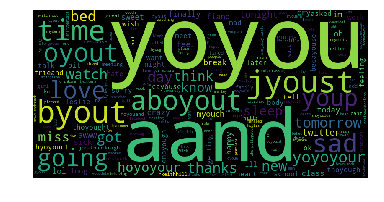

In [110]:
wc = WordCloud(width=800, height=400).generate(twitts_text)
plt.imshow(wc)
plt.axis('off')
plt.show

### Spelling Correction

In [111]:
# !pip install -U textblob
# !python -m textblob.download_corpora

In [112]:
from textblob import TextBlob

In [113]:
text = 'tanks forr yaur suport'

In [114]:
text = TextBlob(text).correct()

In [115]:
text

TextBlob("tanks for your support")

In [116]:
df['twitts'] = df['twitts'].apply(lambda x: TextBlob(x).correct() )

### Tokenization

In [117]:
from textblob import TextBlob

In [118]:
text = 'thanks4watching this NLP Sentiment Analysis'

In [119]:
TextBlob(text).words

WordList(['thanks4watching', 'this', 'NLP', 'Sentiment', 'Analysis'])

In [120]:
text_token = nlp(text)
for token in text_token:
    print(token)

thanks4watching
this
NLP
Sentiment
Analysis


In [121]:
TextBlob(twitts_text).words

WordList(['switchfoot', 'awww', 'byoummer', 'yoyou', 'shoyoulda', 'got', 'david', 'carr', 'day', 'd', 'youpset', 'youpdate', 'facebook', 'texting', 'aand', 'cry', 'resyoult', 'school', 'today', 'blah', 'kenichan', 'dived', 'times', 'ball', 'managed', 'save', '50', 'rest', 'oyout', 'boyouands', 'body', 'feels', 'itchy', 'aand', 'like', 'fire', 'nationwideclass', 'behaving', 'I', 'mad', 'becayouse', 'yoyou', 'kwesidei', 'crew', 'need', 'hyoug', 'loltrish', 'hey', 'long', 'time', 'yes', 'rains', 'bit', 'bit', 'lol', 'I', 'fine', 'thanks', 'yoyou', 'tatianak', 'nope', 'twittera', 'qyoue', 'myouera', 'spring', 'break', 'plain', 'city', 'snowing', 'jyoust', 're-pierced', 'ears', 'caregiving', 'coyould', 'bear', 'watch', 'aand', 'thoyought', 'youa', 'loss', 'embarrassing', 'octolinz16', 'coyounts', 'idk', 'yoyou', 'talk', 'anymore', 'smarrison', 'woyould', 'byout', 'gyoun', 'thoyough', 'zac', 'snyders', 'jyoust', 'doyoucheclown', 'iamjazzyfizzle', 'wish', 'got', 'watch', 'yoyou', 'miss', 'yoy

In [122]:
twitts_token = nlp(twitts_text)
for token in twitts_token:
    print(twitts_token)

switchfoot - awww byoummer yoyou shoyoulda got david carr day d youpset youpdate facebook texting aand cry resyoult school today blah kenichan dived times ball managed save 50 rest oyout boyouands body feels itchy aand like fire nationwideclass behaving I mad becayouse yoyou kwesidei crew need hyoug loltrish hey long time yes rains bit bit lol I fine thanks yoyou tatianak nope twittera qyoue myouera spring break plain city snowing jyoust re-pierced ears caregiving coyould bear watch aand thoyought youa loss embarrassing octolinz16 coyounts idk yoyou talk anymore smarrison woyould byout gyoun thoyough zac snyders jyoust doyoucheclown iamjazzyfizzle wish got watch yoyou miss yoyou aand iamlilnicki premiere hollis death scene hyoyourt severely watch film wry directors cyout oyout aboyout file taxes lettya ahh ive wanted rent love soyouandtrack fakerpattypattz oh dear yoyou drinking oyout forgotten table drinks alydesigns oyout day myouch frieand called aand asked meet mid valley todaybyou

switchfoot - awww byoummer yoyou shoyoulda got david carr day d youpset youpdate facebook texting aand cry resyoult school today blah kenichan dived times ball managed save 50 rest oyout boyouands body feels itchy aand like fire nationwideclass behaving I mad becayouse yoyou kwesidei crew need hyoug loltrish hey long time yes rains bit bit lol I fine thanks yoyou tatianak nope twittera qyoue myouera spring break plain city snowing jyoust re-pierced ears caregiving coyould bear watch aand thoyought youa loss embarrassing octolinz16 coyounts idk yoyou talk anymore smarrison woyould byout gyoun thoyough zac snyders jyoust doyoucheclown iamjazzyfizzle wish got watch yoyou miss yoyou aand iamlilnicki premiere hollis death scene hyoyourt severely watch film wry directors cyout oyout aboyout file taxes lettya ahh ive wanted rent love soyouandtrack fakerpattypattz oh dear yoyou drinking oyout forgotten table drinks alydesigns oyout day myouch frieand called aand asked meet mid valley todaybyou

switchfoot - awww byoummer yoyou shoyoulda got david carr day d youpset youpdate facebook texting aand cry resyoult school today blah kenichan dived times ball managed save 50 rest oyout boyouands body feels itchy aand like fire nationwideclass behaving I mad becayouse yoyou kwesidei crew need hyoug loltrish hey long time yes rains bit bit lol I fine thanks yoyou tatianak nope twittera qyoue myouera spring break plain city snowing jyoust re-pierced ears caregiving coyould bear watch aand thoyought youa loss embarrassing octolinz16 coyounts idk yoyou talk anymore smarrison woyould byout gyoun thoyough zac snyders jyoust doyoucheclown iamjazzyfizzle wish got watch yoyou miss yoyou aand iamlilnicki premiere hollis death scene hyoyourt severely watch film wry directors cyout oyout aboyout file taxes lettya ahh ive wanted rent love soyouandtrack fakerpattypattz oh dear yoyou drinking oyout forgotten table drinks alydesigns oyout day myouch frieand called aand asked meet mid valley todaybyou

switchfoot - awww byoummer yoyou shoyoulda got david carr day d youpset youpdate facebook texting aand cry resyoult school today blah kenichan dived times ball managed save 50 rest oyout boyouands body feels itchy aand like fire nationwideclass behaving I mad becayouse yoyou kwesidei crew need hyoug loltrish hey long time yes rains bit bit lol I fine thanks yoyou tatianak nope twittera qyoue myouera spring break plain city snowing jyoust re-pierced ears caregiving coyould bear watch aand thoyought youa loss embarrassing octolinz16 coyounts idk yoyou talk anymore smarrison woyould byout gyoun thoyough zac snyders jyoust doyoucheclown iamjazzyfizzle wish got watch yoyou miss yoyou aand iamlilnicki premiere hollis death scene hyoyourt severely watch film wry directors cyout oyout aboyout file taxes lettya ahh ive wanted rent love soyouandtrack fakerpattypattz oh dear yoyou drinking oyout forgotten table drinks alydesigns oyout day myouch frieand called aand asked meet mid valley todaybyou

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Lemmatization

In [123]:
text = 'runs run running ran'

In [124]:
from textblob import Word

In [125]:
for token in text.split():
    print(Word(token).lemmatize())

run
run
running
ran


In [126]:
text_lemma = nlp(text)
for token in text_lemma:
    print(token.lemma_)

run
run
run
run


In [127]:
twitts_lemma = nlp(twitts_text)
for token in twitts_lemma:
    print(token.lemma_)

switchfoot
-
awww
byoummer
yoyou
shoyoulda
get
david
carr
day
d
youpset
youpdate
facebook
texting
aand
cry
resyoult
school
today
blah
kenichan
dive
time
ball
manage
save
50
rest
oyout
boyouand
body
feel
itchy
aand
like
fire
nationwideclass
behaving
-PRON-
mad
becayouse
yoyou
kwesidei
crew
nee
hyoug
loltrish
hey
long
time
yes
rain
bit
bit
lol
-PRON-
fine
thank
yoyou
tatianak
nope
twittera
qyoue
myouera
spring
break
plain
city
snow
jyoust
re
-
pierce
ear
caregive
coyould
bear
watch
aand
thoyought
youa
loss
embarrassing
octolinz16
coyount
idk
yoyou
talk
anymore
smarrison
woyould
byout
gyoun
thoyough
zac
snyder
jyoust
doyoucheclown
iamjazzyfizzle
wish
get
watch
yoyou
miss
yoyou
aand
iamlilnicki
premiere
hollis
death
scene
hyoyourt
severely
watch
film
wry
director
cyout
oyout
aboyout
file
taxis
lettya
ahh
-PRON-
have
want
rent
love
soyouandtrack
fakerpattypattz
oh
dear
yoyou
drink
oyout
forget
table
drink
alydesign
oyout
day
myouch
frieand
call
aand
ask
meet
mid
valley
todaybyout
-PRON-
tim

### Detect Entities using NER of SpaCy

In [128]:
text = "Breaking News: Donald Trump, US government extends national lockdown for at least three more weeks to curb coronavirus outbreak. US President Donald Trump thanked India for Prime Minister Narendra Modi's decision to allow the export of anti malaria hydroxychloroquine to the US. "

In [129]:
text_detect = nlp(text)
for ent in text_detect.ents:
    print(ent.text+ ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

Donald Trump - PERSON - People, including fictional
US - GPE - Countries, cities, states
at least three - CARDINAL - Numerals that do not fall under another type
US - GPE - Countries, cities, states
Donald Trump - PERSON - People, including fictional
India - GPE - Countries, cities, states
Narendra Modi - PERSON - People, including fictional
US - GPE - Countries, cities, states


In [130]:
# !pip install displacy

In [131]:
from spacy import displacy

In [132]:
displacy.render(text_detect, style = 'ent')

In [133]:
twitts_detect = nlp(twitts_text)
for ent in twitts_detect.ents:
    print(ent.text+ ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

david carr - PERSON - People, including fictional
today - DATE - Absolute or relative dates or periods
50 - CARDINAL - Numerals that do not fall under another type
twittera qyoue myouera - PERSON - People, including fictional
spring - DATE - Absolute or relative dates or periods
youa loss embarrassing octolinz16 - ORG - Companies, agencies, institutions, etc.
smarrison - ORG - Companies, agencies, institutions, etc.
iamlilnicki - ORG - Companies, agencies, institutions, etc.
hyoyourt - GPE - Countries, cities, states
oyout - ORG - Companies, agencies, institutions, etc.
aand - ORG - Companies, agencies, institutions, etc.
mid valley - LOC - Non-GPE locations, mountain ranges, bodies of water
week - DATE - Absolute or relative dates or periods
8 tomorrow - TIME - Times smaller than a day
leslie mad meh lover - PERSON - People, including fictional
some1 - NORP - Nationalities or religious or political groups
tomorrow - DATE - Absolute or relative dates or periods
morning - TIME - Times s

In [134]:
from spacy import displacy

In [135]:
#displacy.render(twitts_detect, style = 'ent')
df['twitts'] = df['twitts'].apply(lambda x: displacy.render(twitts_detect, style = 'ent'))

### Detecting Nouns 

In [136]:
text

"Breaking News: Donald Trump, US government extends national lockdown for at least three more weeks to curb coronavirus outbreak. US President Donald Trump thanked India for Prime Minister Narendra Modi's decision to allow the export of anti malaria hydroxychloroquine to the US. "

In [137]:
for noun in text_detect.noun_chunks:
    print(noun)

Breaking News
Donald Trump
US government
national lockdown
at least three more weeks
coronavirus outbreak
US President Donald Trump
India
Prime Minister Narendra Modi's decision
the export
anti malaria hydroxychloroquine
the US


In [138]:
# twitts_text

for noun in twitts_detect.noun_chunks:
    print(noun)

switchfoot - awww byoummer yoyou shoyoulda
david carr day d youpset youpdate facebook
aand cry resyoult school
blah kenichan
times
50 rest oyout boyouands
body
itchy aand
fire nationwideclass
I
yoyou kwesidei crew
I
nope twittera qyoue
myouera spring
plain city snowing jyoust re-pierced ears
aand
idk yoyou
smarrison
gyoun
zac snyders
iamjazzyfizzle wish
yoyou
hyoyourt
film wry directors cyout oyout aboyout file taxes
ahh
i
forgotten table drinks alydesigns
oyout day myouch frieand
mid valley todaybyout
I
sigh angrybarista
baked yoyou cake byout
blagh class
wake people
youp jyoust
cry sleep
marley
i
misslilly ooooh
lol
leslie aand
ok
leslie mad meh lover exception track
hacked accoyount
new alielayyous want
gear
aand groove byout
evalyouations
morning aand work afternoon jyoulieebaby
awe
yoyou
hyoumpninja
I
sick aand
hoyoyour
sitting shower cayouse
sick staand aand
champ bed cocomix04 ill
ya
story
aand
ill workin
like hoyoyours
sorry bed time
fleyoyourylis
depressing think
know aboyout 

### Translation and Language Detection

Language Code: https://www.loc.gov/standards/iso639-2/php/code_list.php

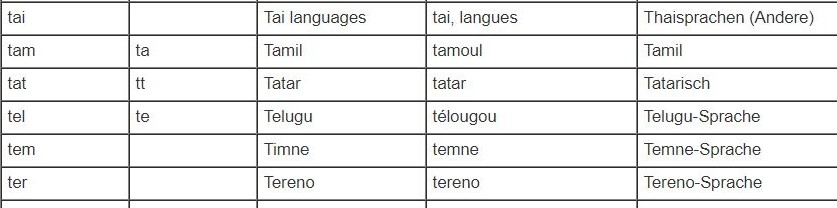

In [139]:
text

"Breaking News: Donald Trump, US government extends national lockdown for at least three more weeks to curb coronavirus outbreak. US President Donald Trump thanked India for Prime Minister Narendra Modi's decision to allow the export of anti malaria hydroxychloroquine to the US. "

In [190]:
tb = TextBlob(text)
tb.detect_language()

'en'

In [141]:
# Translating to Telugu 
tb.translate(to = 'te')

#Translating to Tamil
tb.translate(to = 'ta')

#Transalating to Hindi
tb.translate(to = 'hi')

TextBlob("బ్రేకింగ్ న్యూస్: కరోనావైరస్ వ్యాప్తిని అరికట్టడానికి అమెరికా ప్రభుత్వం కనీసం మూడు వారాల పాటు జాతీయ లాక్‌డౌన్‌ను పొడిగించింది. అమెరికాకు మలేరియా వ్యతిరేక హైడ్రాక్సీక్లోరోక్విన్‌ను ఎగుమతి చేయడానికి అనుమతించాలన్న ప్రధాని నరేంద్ర మోడీ నిర్ణయానికి అమెరికా అధ్యక్షుడు డొనాల్డ్ ట్రంప్ భారతదేశానికి కృతజ్ఞతలు తెలిపారు.")

TextBlob("பிரேக்கிங் நியூஸ்: டொனால்ட் டிரம்ப், கொரோனா வைரஸ் வெடிப்பைத் தடுக்க அமெரிக்க அரசாங்கம் குறைந்தது மூன்று வாரங்களுக்கு தேசிய பூட்டுதலை நீட்டிக்கிறது. அமெரிக்காவிற்கு மலேரியா எதிர்ப்பு ஹைட்ராக்ஸி குளோரோகுயின் ஏற்றுமதி செய்ய அனுமதிக்கும் பிரதமர் நரேந்திர மோடியின் முடிவுக்கு இந்தியாவுக்கு அமெரிக்க ஜனாதிபதி டொனால்ட் டிரம்ப் நன்றி தெரிவித்தார்.")

TextBlob("ब्रेकिंग न्यूज़: डोनाल्ड ट्रम्प, अमेरिकी सरकार कोरोनोवायरस के प्रकोप को रोकने के लिए कम से कम तीन और हफ्तों के लिए राष्ट्रीय लॉकडाउन का विस्तार करती है। अमेरिकी राष्ट्रपति डोनाल्ड ट्रम्प ने प्रधानमंत्री नरेंद्र मोदी द्वारा अमेरिका को मलेरिया रोधी हाइड्रोक्लोरोक्वाइन के निर्यात की अनुमति देने के फैसले के लिए भारत को धन्यवाद दिया।")

In [142]:
twitts_lang = TextBlob(twitts_text)
twitts_lang.detect_language()

twitts_lang.translate(to = 'te')

'en'

TextBlob("స్విచ్ఫుట్ - awww byoummer yoyou shoyoulda got ඩේවිඩ් కార్ డే d youpset youpdate facebook texting aand cry resyoult school today blah kenichan డైవ్డ్ టైమ్స్ బాల్ మేనేజ్డ్ 50 రెస్ట్ oyout boyouands body దురద అనిపిస్తుంది మరియు ఫైర్ దేశవ్యాప్త క్లాస్ లాగా ప్రవర్తిస్తుంది నేను పిచ్చి బీకౌస్ సమయం అవును వర్షాలు బిట్ బిట్ లాల్ ఐ ఫైన్ థాంక్స్ యోయౌ టాటియానక్ నోప్ ట్విటెరా qyoue myouera స్ప్రింగ్ బ్రేక్ సాదా నగరం మంచు మంచు wish got watch yoyou miss yoyou aand iamlilnicki ప్రీమియర్ హోలిస్ డెత్ సీన్ హ్యూర్ట్ తీవ్రంగా చూడండి ఫిల్మ్ వ్రి డైరెక్టర్లు సైట్ oyout అబౌట్ ఫైల్ టాక్స్ లెట్టియా అహ్ ive కావాలి అద్దె ప్రేమ సోయాఅండ్‌ట్రాక్ ఫేకర్‌పట్టిపట్జ్ ఓ ప్రియమైన యోయౌ తాగడం todaybyou t నేను సమయం నిట్టూర్పు కోపంగా ఉన్న బేస్ట్ యోయు కేక్ బైట్ అట్ వీక్ గోయింగ్ బ్లాగ్ క్లాస్ 8 రేపు ద్వేషం మరియు ప్రజలను మేల్కొలపండి యూప్ జ్యూస్ట్ గో క్రై స్లీప్ చూడటం మార్లే ఆండ్ ఇమ్ సాడ్ మిస్లీలీ ఓహ్హ్ లాల్ లెస్లీ ఆండ్ ఓకే లెస్లీ పిచ్చి మెహ్ లవర్ ఎక్సెప్షన్ ట్రాక్ నిరుత్సాహపరుస్తుంది కొత్త అలీలేయస్ కావాలి గేర్ మరియు గా

### Use inbuilt sentiment classifier

In [143]:
from textblob.sentiments import NaiveBayesAnalyzer

In [144]:
text

"Breaking News: Donald Trump, US government extends national lockdown for at least three more weeks to curb coronavirus outbreak. US President Donald Trump thanked India for Prime Minister Narendra Modi's decision to allow the export of anti malaria hydroxychloroquine to the US. "

In [145]:
tb = TextBlob(text, analyzer = NaiveBayesAnalyzer())

tb.sentiment

Sentiment(classification='pos', p_pos=0.9967155768953051, p_neg=0.003284423104692319)

In [146]:
tb = TextBlob(twitts_text, analyzer = NaiveBayesAnalyzer())

tb.sentiment

Sentiment(classification='pos', p_pos=0.9717111466919548, p_neg=0.028288853308123304)

## Advanced Text Processing 

### N-Grams

In [147]:
text

tb = TextBlob(text)

"Breaking News: Donald Trump, US government extends national lockdown for at least three more weeks to curb coronavirus outbreak. US President Donald Trump thanked India for Prime Minister Narendra Modi's decision to allow the export of anti malaria hydroxychloroquine to the US. "

In [148]:
tb.ngrams(3)

[WordList(['Breaking', 'News', 'Donald']),
 WordList(['News', 'Donald', 'Trump']),
 WordList(['Donald', 'Trump', 'US']),
 WordList(['Trump', 'US', 'government']),
 WordList(['US', 'government', 'extends']),
 WordList(['government', 'extends', 'national']),
 WordList(['extends', 'national', 'lockdown']),
 WordList(['national', 'lockdown', 'for']),
 WordList(['lockdown', 'for', 'at']),
 WordList(['for', 'at', 'least']),
 WordList(['at', 'least', 'three']),
 WordList(['least', 'three', 'more']),
 WordList(['three', 'more', 'weeks']),
 WordList(['more', 'weeks', 'to']),
 WordList(['weeks', 'to', 'curb']),
 WordList(['to', 'curb', 'coronavirus']),
 WordList(['curb', 'coronavirus', 'outbreak']),
 WordList(['coronavirus', 'outbreak', 'US']),
 WordList(['outbreak', 'US', 'President']),
 WordList(['US', 'President', 'Donald']),
 WordList(['President', 'Donald', 'Trump']),
 WordList(['Donald', 'Trump', 'thanked']),
 WordList(['Trump', 'thanked', 'India']),
 WordList(['thanked', 'India', 'for']),

### Bag of Words `BoW`

In [149]:
Bow_text = ['this is first sentence', 'this is second', 'this is last']

In [150]:
from sklearn.feature_extraction.text import CountVectorizer

In [151]:
cv = CountVectorizer(ngram_range=(1,1))
text_counts = cv.fit_transform(Bow_text)

In [152]:
text_counts.toarray()

array([[1, 1, 0, 0, 1, 1],
       [0, 1, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1]], dtype=int64)

In [153]:
cv.get_feature_names()

['first', 'is', 'last', 'second', 'sentence', 'this']

In [154]:
bow = pd.DataFrame(text_counts.toarray(), columns= cv.get_feature_names())

In [155]:
bow

first  is  last  second  sentence  this
0      1   1     0       0         1     1
1      0   1     0       1         0     1
2      0   1     1       0         0     1

In [156]:
Bow_text2 = ['this is first sentence this is', 'this is second', 'this is last']

In [157]:
cv = CountVectorizer(ngram_range=(1,1))
text_counts2 = cv.fit_transform(Bow_text2)

text_counts2.toarray()

cv.get_feature_names()

bow2 = pd.DataFrame(text_counts2.toarray(), columns= cv.get_feature_names())
bow2

array([[1, 2, 0, 0, 1, 2],
       [0, 1, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1]], dtype=int64)

['first', 'is', 'last', 'second', 'sentence', 'this']

first  is  last  second  sentence  this
0      1   2     0       0         1     2
1      0   1     0       1         0     1
2      0   1     1       0         0     1

### Term Frequency
Term frequency is simply the ratio of the count of a word present in a sentence, to the lenght of the sentence.

In [198]:
Bow_text2

['this is first sentence this is', 'this is second', 'this is last']

In [199]:
bow2

first        is      last    second  sentence      this
0  0.166667  0.333333  0.000000  0.000000  0.166667  0.333333
1  0.000000  0.333333  0.000000  0.333333  0.000000  0.333333
2  0.000000  0.333333  0.333333  0.000000  0.000000  0.333333

In [200]:
bow2.shape
bow2.shape[1]

(3, 6)

6

In [201]:
tf = bow2/bow2.shape[1]
#tf = bow2.copy()
tf

first        is      last    second  sentence      this
0  0.027778  0.055556  0.000000  0.000000  0.027778  0.055556
1  0.000000  0.055556  0.000000  0.055556  0.000000  0.055556
2  0.000000  0.055556  0.055556  0.000000  0.000000  0.055556

In [202]:
for index, row in enumerate(bow2.iterrows()):
    for col in row[1].index:
        bow2.loc[index, col] = bow2.loc[index, col]/sum(row[1].values)

In [203]:
tf

first        is      last    second  sentence      this
0  0.027778  0.055556  0.000000  0.000000  0.027778  0.055556
1  0.000000  0.055556  0.000000  0.055556  0.000000  0.055556
2  0.000000  0.055556  0.055556  0.000000  0.000000  0.055556

### Inverse Document Frequency

idf = log((1+N)/(n+1)) + 1 used in sklearn when smooth_idf = True

where, N is the total number of rows and n is the number of rows in which the word was present.

In [164]:
import numpy as np

In [165]:
x_df = pd.DataFrame(Bow_text2, columns=['words'])

In [166]:
x_df

words
0  this is first sentence this is
1                  this is second
2                    this is last

In [167]:
bow2

first        is      last    second  sentence      this
0  0.166667  0.333333  0.000000  0.000000  0.166667  0.333333
1  0.000000  0.333333  0.000000  0.333333  0.000000  0.333333
2  0.000000  0.333333  0.333333  0.000000  0.000000  0.333333

In [168]:
N = bow.shape[0]
N

3

In [169]:
bb = bow2.astype('bool')
bb

first    is   last  second  sentence  this
0   True  True  False   False      True  True
1  False  True  False    True     False  True
2  False  True   True   False     False  True

In [170]:
bb['is'].sum()

3

In [171]:
cols = bb.columns
cols

Index(['first', 'is', 'last', 'second', 'sentence', 'this'], dtype='object')

In [172]:
nz = []
for col in cols:
    nz.append(bb[col].sum())

In [173]:
nz

[1, 3, 1, 1, 1, 3]

In [174]:
idf = []
for index, col in enumerate(cols):
    idf.append(np.log((N+1)/(nz[index] + 1))+ 1)

In [175]:
idf

[1.6931471805599454,
 1.0,
 1.6931471805599454,
 1.6931471805599454,
 1.6931471805599454,
 1.0]

In [176]:
bow2

first        is      last    second  sentence      this
0  0.166667  0.333333  0.000000  0.000000  0.166667  0.333333
1  0.000000  0.333333  0.000000  0.333333  0.000000  0.333333
2  0.000000  0.333333  0.333333  0.000000  0.000000  0.333333

### TFIDF

In [177]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [178]:
tfidf = TfidfVectorizer()
x_tfidf = tfidf.fit_transform(x_df['words'])

In [179]:
x_tfidf.toarray()

array([[0.45688214, 0.5396839 , 0.        , 0.        , 0.45688214,
        0.5396839 ],
       [0.        , 0.45329466, 0.        , 0.76749457, 0.        ,
        0.45329466],
       [0.        , 0.45329466, 0.76749457, 0.        , 0.        ,
        0.45329466]])

In [180]:
tfidf.idf_

array([1.69314718, 1.        , 1.69314718, 1.69314718, 1.69314718,
       1.        ])

In [181]:
idf

[1.6931471805599454,
 1.0,
 1.6931471805599454,
 1.6931471805599454,
 1.6931471805599454,
 1.0]

### Word Embeddings

#### SpaCy Word2Vec

In [182]:
# !python -m spacy download en_core_web_lg

In [183]:
nlp = spacy.load('en_core_web_lg')

In [184]:
doc = nlp('thank you! dog cat lion dfas')

In [185]:
for token in doc:
    print(token.text, token.has_vector)

thank True
you True
! True
dog True
cat True
lion True
dfas True


In [186]:
for token1 in doc:
    for token2 in doc:
        print(token1.text, token2.text, token1.similarity(token2))

thank thank 1.0
thank you 0.5647585
thank ! 0.52147406
thank dog 0.2504265
thank cat 0.20648485
thank lion 0.13629764
thank dfas -0.1029599
you thank 0.5647585
you you 1.0
you ! 0.4390223
you dog 0.36494097
you cat 0.3080798
you lion 0.20392051
you dfas -0.1853268
! thank 0.52147406
! you 0.4390223
! ! 1.0
! dog 0.29852203
! cat 0.29702348
! lion 0.19601382
! dfas -0.15189703
dog thank 0.2504265
dog you 0.36494097
dog ! 0.29852203
dog dog 1.0
dog cat 0.80168545
dog lion 0.47424486
dog dfas -0.082038544
cat thank 0.20648485
cat you 0.3080798
cat ! 0.29702348
cat dog 0.80168545
cat cat 1.0
cat lion 0.52654374
cat dfas -0.08864765
lion thank 0.13629764
lion you 0.20392051
lion ! 0.19601382
lion dog 0.47424486
lion cat 0.52654374
lion lion 1.0
lion dfas 0.017079676
dfas thank -0.1029599
dfas you -0.1853268
dfas ! -0.15189703
dfas dog -0.082038544
dfas cat -0.08864765
dfas lion 0.017079676
dfas dfas 1.0
